## **TP3 - Gustavo Uñapillco**

#### **Bases de datos de grafos**

#### **1. Obtener los nodos de todas las personas de la red.**


```bash
match(p:Persona) 
return p
```

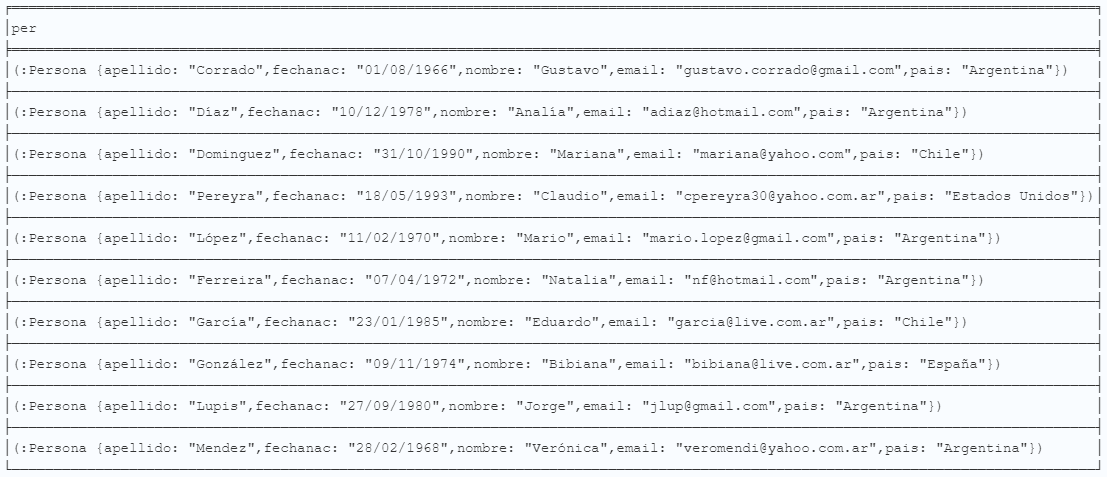

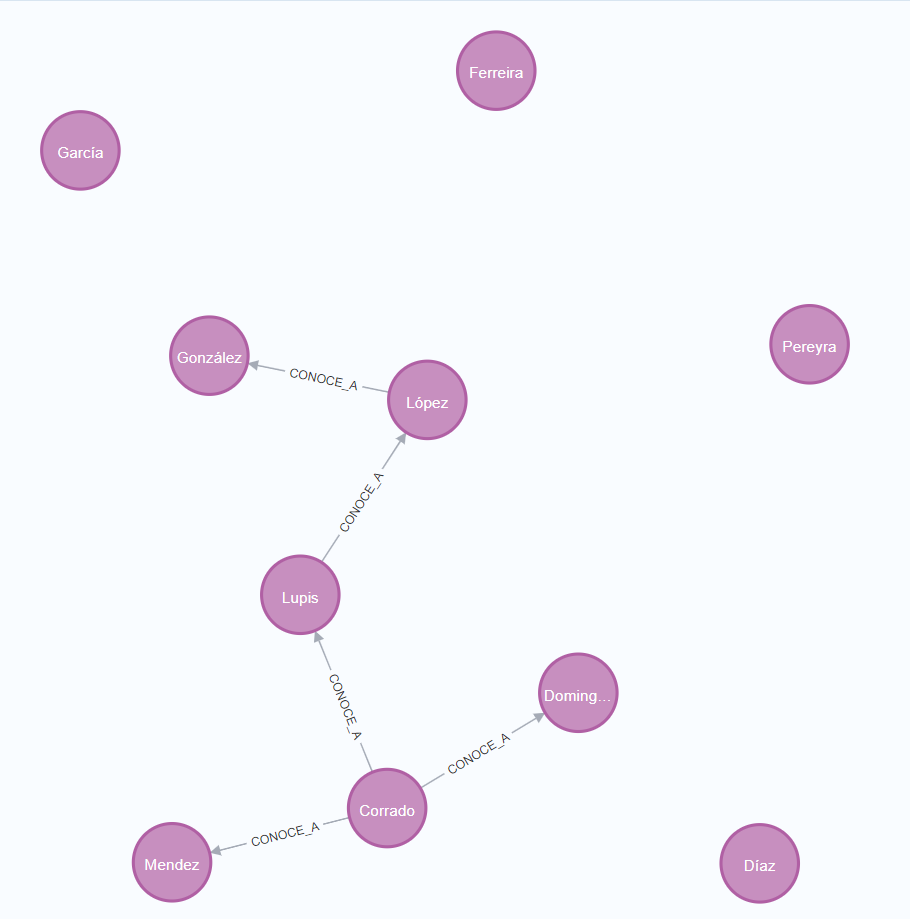

#### **2. Obtener el nombre y fecha de nacimiento de la persona de apellido Domínguez.** 


``` bash -- 
MATCH (p:Persona {apellido: "Dominguez"})
RETURN p.nombre, p.fechanac;
```

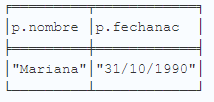

#### **3. Obtener la lista de empresas en las que trabajó Domínguez.** 


``` bash -- 
MATCH (p:Persona {apellido: "Dominguez"})-[:TRABAJO]->(e:Empresa)
RETURN e.nombre;
```

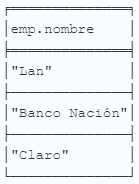

#### **4. Obtener la lista de personas que estudiaron carreras que no son de nivel “Universitario” y los nombres de las carreras.** 


``` bash -- 
MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera)
WHERE c.nivel <> "Universitario"
RETURN p.nombre, p.apellido, c.nombre;

```

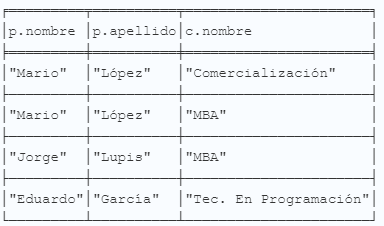

#### **5. Obtener los nodos etiquetados como Conocimiento.** 


``` bash -- 
MATCH (c:Conocimiento)
RETURN c;
```

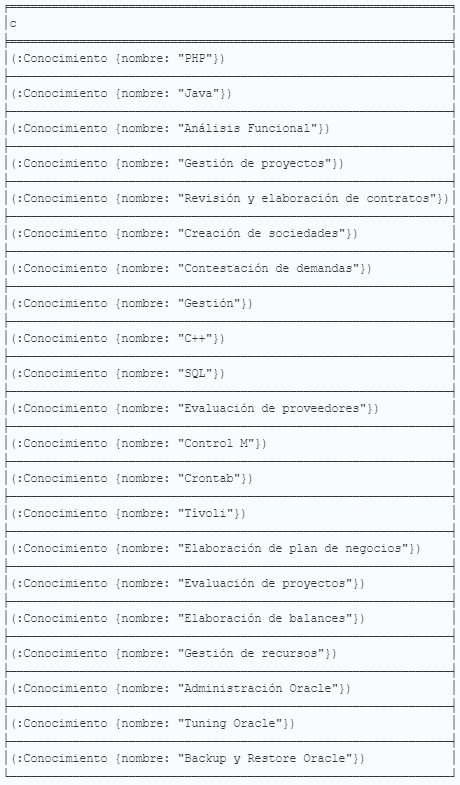

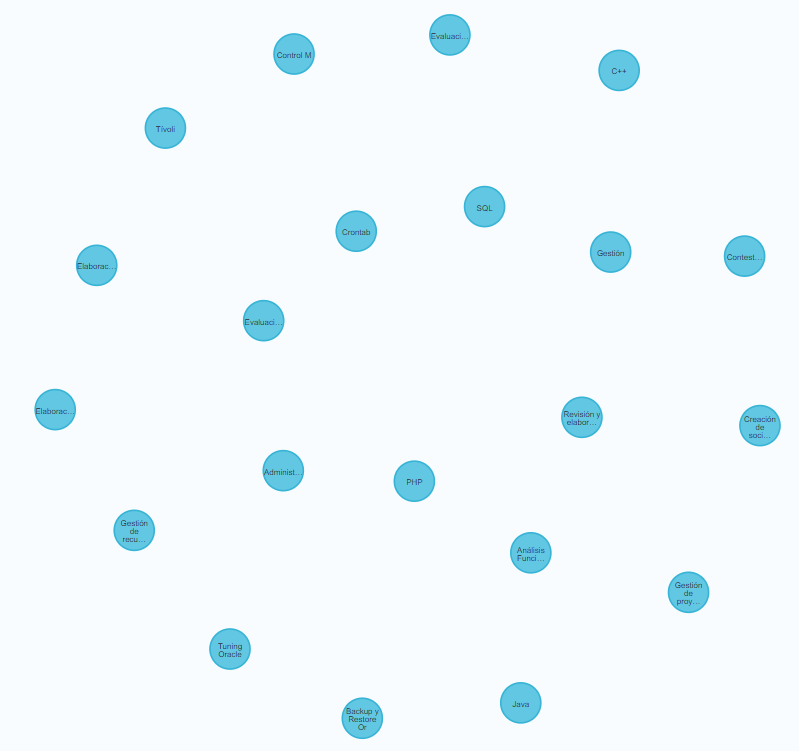

#### **6. Obtener los nodos de todas las personas con nombre terminado en a.**


``` bash -- 
MATCH (p:Persona)
WHERE p.nombre ENDS WITH "a"
RETURN p;
```

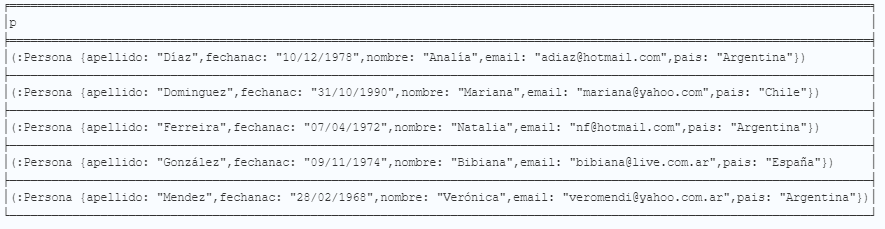

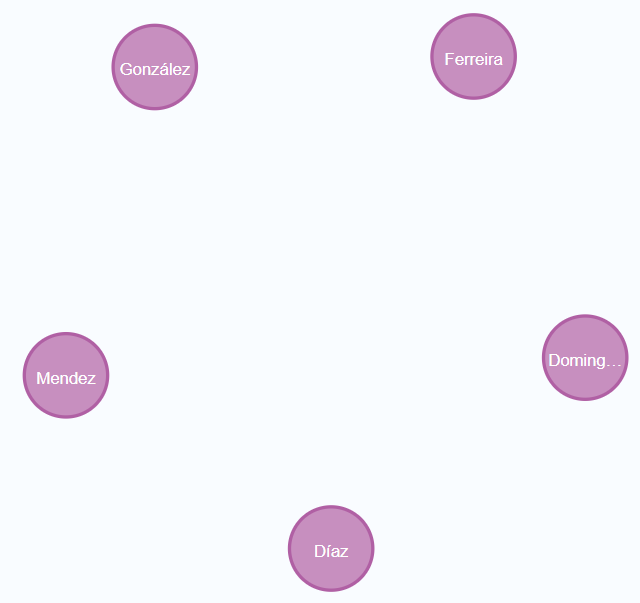

#### **7. Crear un nodo para la persona Analía Martinelli si no existe.** 


``` bash --
MERGE (p:Persona {nombre: "Analía", apellido: "Martinelli"});
```

Compruebo si se creo o no, deberìa aparecer con la consulta del punto 6. 

``` bash -- 
MATCH (p:Persona)
WHERE p.nombre ENDS WITH "a"
RETURN p;
```


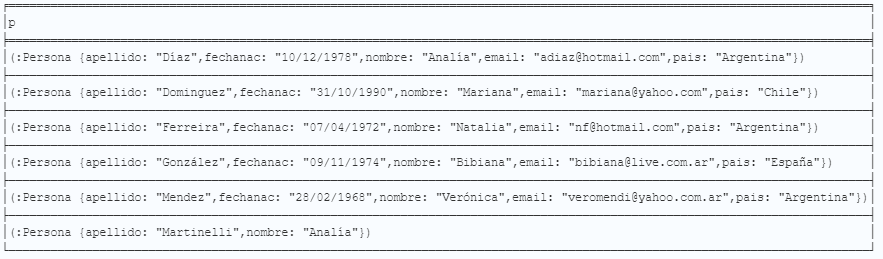

#### **8. Asociar un conocimiento "Cálculo" a Analía Martinelli si no lo posee.** 


``` bash -- 
MATCH (p:Persona {nombre: "Analía", apellido: "Martinelli"})
MERGE (c:Conocimiento {nombre: "Cálculo"})
MERGE (p)-[r:POSEE]->(c)
RETURN p.nombre, p.apellido, type(r) AS tipoRelacion, c.nombre AS carrera;
```

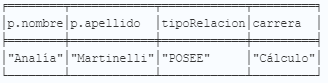

#### **9. Verificar si se creó duplicado del conocimiento "Cálculo".** 


``` bash -- 
MATCH (c:Conocimiento {nombre: "Cálculo"})
RETURN count(c);
```

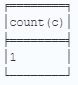

#### **10. Crear una relación ESTUDIO para Analía Martinelli con la carrera "Lic en Sist de Inf", estado "En curso".**


``` bash -- 
MATCH (p:Persona {nombre: "Analía", apellido: "Martinelli"})
MATCH (c:Carrera {nombre: "Lic en Sist de Inf"})
MERGE (p)-[r:ESTUDIO]->(c)
SET r.estado = "En curso"
RETURN p.nombre, p.apellido, type(r) AS tipoRelacion, r.estado, c.nombre AS carrera;
```

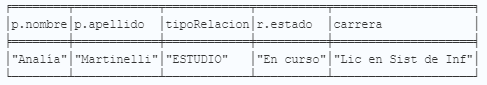

#### **11. Crear un nodo para Verónica Mendez.** 


``` bash -- 
MERGE (p:Persona {nombre: "Verónica", apellido: "Mendez"})
RETURN p.nombre, p.apellido, labels(p) AS etiquetas, id(p) AS id_nodo;
```

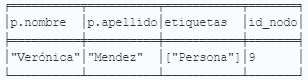

#### **12. Crear una relación CONOCE_A entre Analía y Verónica, asegurando que solo se cree una vez.**


``` bash -- 
MATCH (a:Persona {nombre: "Analía", apellido: "Martinelli"})
MATCH (v:Persona {nombre: "Verónica", apellido: "Mendez"})
MERGE (a)-[r:CONOCE_A]->(v)
RETURN a.nombre, a.apellido, type(r) AS tipoRelacion, v.nombre, v.apellido;
```

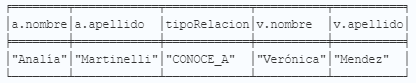

#### **13. Actualizar o crear el nodo de Analía Martinelli con fecha de nacimiento 30/06/1968.** 


``` bash -- 
MATCH (p:Persona {nombre: "Analía", apellido: "Martinelli"})
SET p.fechanac = "30/06/1968"
RETURN p.nombre, p.apellido, p.fechanac;
```

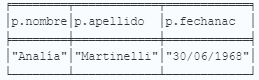

#### **14. Agregarle la etiqueta "Empleado" y el país Argentina a Analía.** 

``` bash -- 
MATCH (p:Persona {nombre: "Analía", apellido: "Martinelli"})
SET p:Empleado
SET p.pais = "Argentina"
RETURN p.nombre, p.apellido, labels(p) AS etiquetas, p.pais;
```

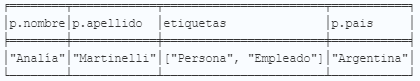

#### **15. Eliminar la fecha de nacimiento y la etiqueta Persona de Analía.** 

``` bash -- 
MATCH (p {nombre: "Analía", apellido: "Martinelli"})
REMOVE p.fechanac
REMOVE p:Persona
RETURN p.nombre, p.apellido, labels(p) AS etiquetasActuales;
```

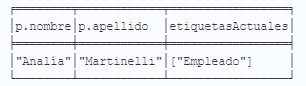

#### **16. Eliminar el nodo de Analía y todas sus relaciones.** 

``` bash -- 
MATCH (p {nombre: "Analía", apellido: "Martinelli"})
WITH p, id(p) AS id_p
DETACH DELETE p
RETURN id_p AS idNodoEliminado;
```

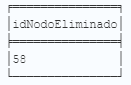

#### **17. Contar los nodos en total.** 


``` bash -- 
MATCH (n)
RETURN count(n) AS cantidadNodos;
```

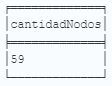

#### **18. Contar los tipos de relaciones.** 


``` bash -- 
MATCH ()-[r]->()
RETURN type(r) AS tipoRelacion, count(*) AS cantidad;
```

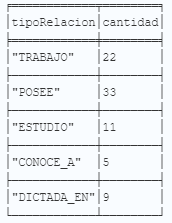

#### **19. Listar todos los nodos y sus relaciones.** 


``` bash -- 
MATCH (n)-[r]->(m)
RETURN n, type(r), m;
```

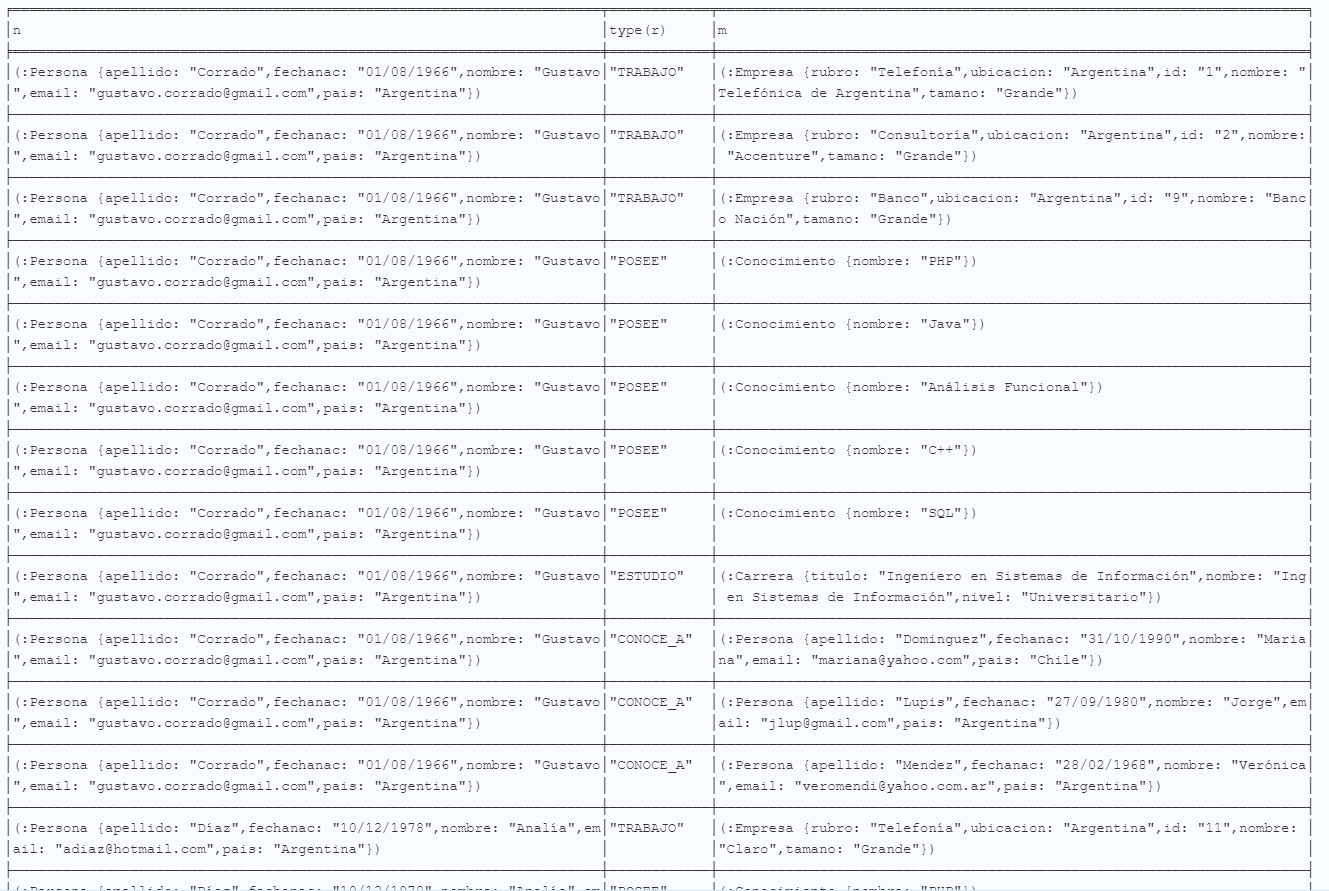

La tabla continúa..

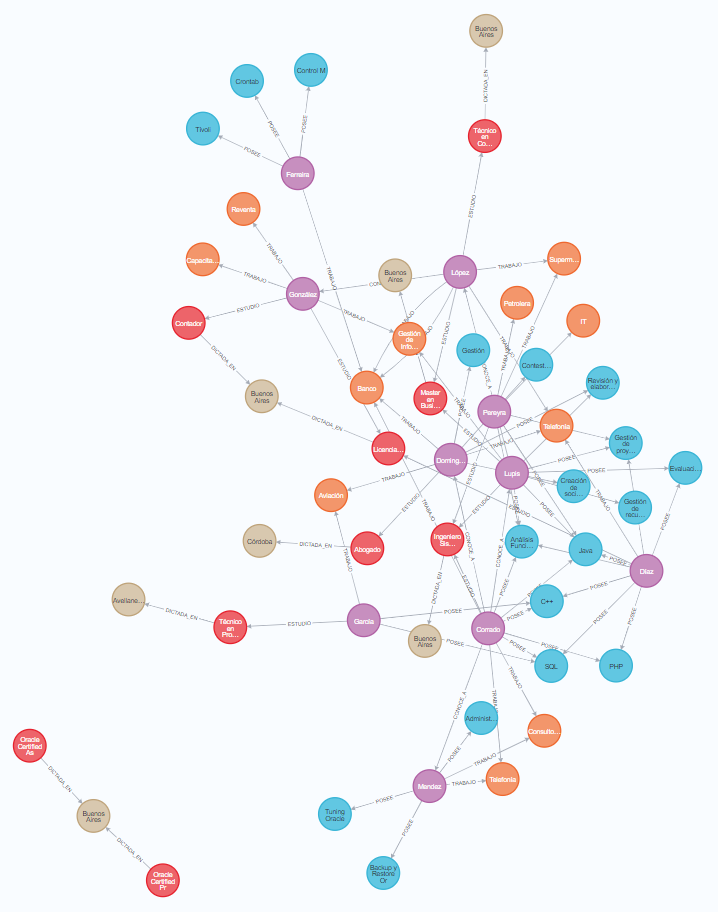

#### **20. Obtener los nombres y rubros de las empresas registradas, reemplazando el rubro "Telefonía" por IT.** 


``` bash -- 
MATCH (e:Empresa)
RETURN e.nombre, 
       CASE WHEN e.rubro = "Telefonía" THEN "IT" ELSE e.rubro END AS rubro_actualizado;
```

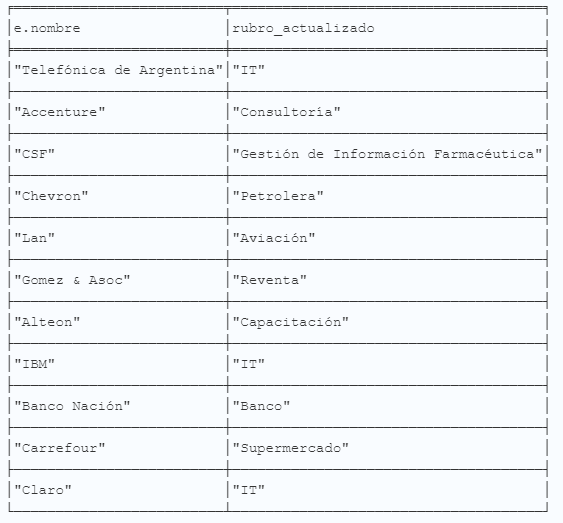

#### **21. Determinar qué etiquetas tienen los nodos que son destino de la relación ESTUDIO.** 


``` bash -- 
MATCH ()-[:ESTUDIO]->(destino)
RETURN labels(destino) AS etiquetasDestino
ORDER BY etiquetasDestino;
```

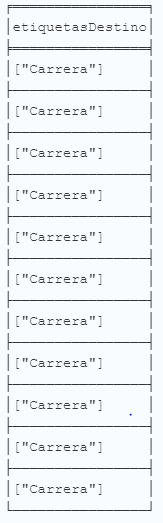

#### **22. Verificar las etiquetas de la carrera en la relación ESTUDIO.** 


``` bash -- 
MATCH (p)-[:ESTUDIO]->(c)
RETURN DISTINCT labels(c) AS etiquetasCarrera;
```

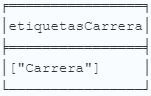

#### **23. Usar UNWIND para transformar una colección en filas individuales.** 


``` bash -- 
WITH ["PHP", "Java", "SQL"] AS conocimientos
UNWIND conocimientos AS conocimiento
RETURN conocimiento;
```

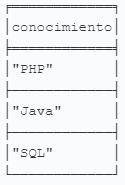

#### **24. Contar la cantidad de personas que estudiaron una carrera en cualquier estado.** 


``` bash -- 
MMATCH (p:Persona)-[:ESTUDIO]->(:Carrera)
RETURN count(DISTINCT p) AS cantidadPersonasEstudiaron;
```

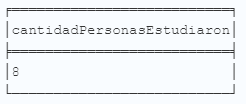

#### **25. Identificar si puede llegarse directa o indirectamente desde Mario López hasta Jorge Lupis mediante la relación CONOCE_A.** 


``` bash -- 
MATCH (m:Persona {nombre: "Mario", apellido: "López"})
MATCH (j:Persona {nombre: "Jorge", apellido: "Lupis"})
OPTIONAL MATCH path = (m)-[:CONOCE_A]->(j)
RETURN m.nombre AS origen, j.nombre AS destino, path;
```

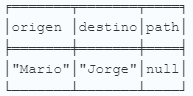

Ojo que tienen una dirección: Desde Lopez hacía Lupis. 

Si fuera al revés, si habría un camino. 

``` bash -- 
MATCH (m:Persona {nombre: "Mario", apellido: "López"})
MATCH (j:Persona {nombre: "Jorge", apellido: "Lupis"})
OPTIONAL MATCH path = (j)-[:CONOCE_A]->(m)
RETURN j.nombre AS origen, m.nombre AS destino, path;
```

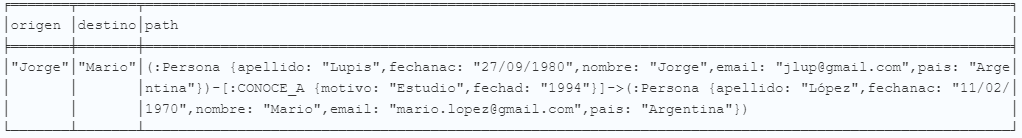

#### **26. Obtener el camino más corto entre Gustavo y Mario en la relación CONOCE_A.** 


``` bash -- 
MATCH (g:Persona {nombre: "Gustavo"}), (m:Persona {nombre: "Mario"})
MATCH path = shortestPath((g)-[:CONOCE_A*]-(m))
RETURN g.nombre AS Origen, m.nombre AS Destino, path;
```

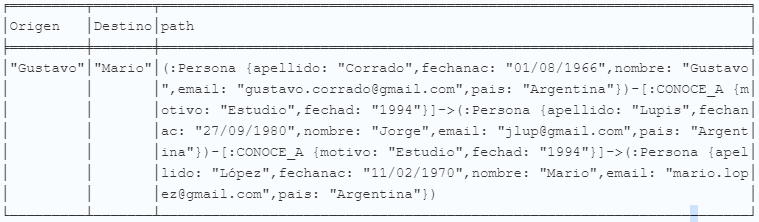

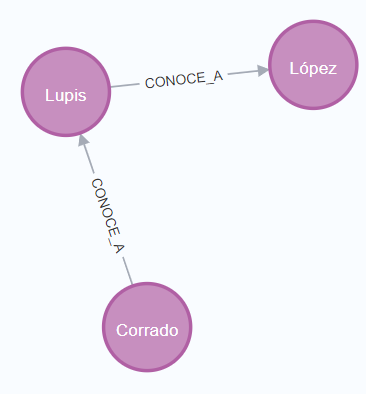

#### **27. Listar los caminos de relaciones de un camino determinado.** 


``` bash -- 
MATCH path = (p:Persona)-[:CONOCE_A*]->(otro:Persona)
RETURN nodes(path) AS nodos, relationships(path) AS relaciones;
```

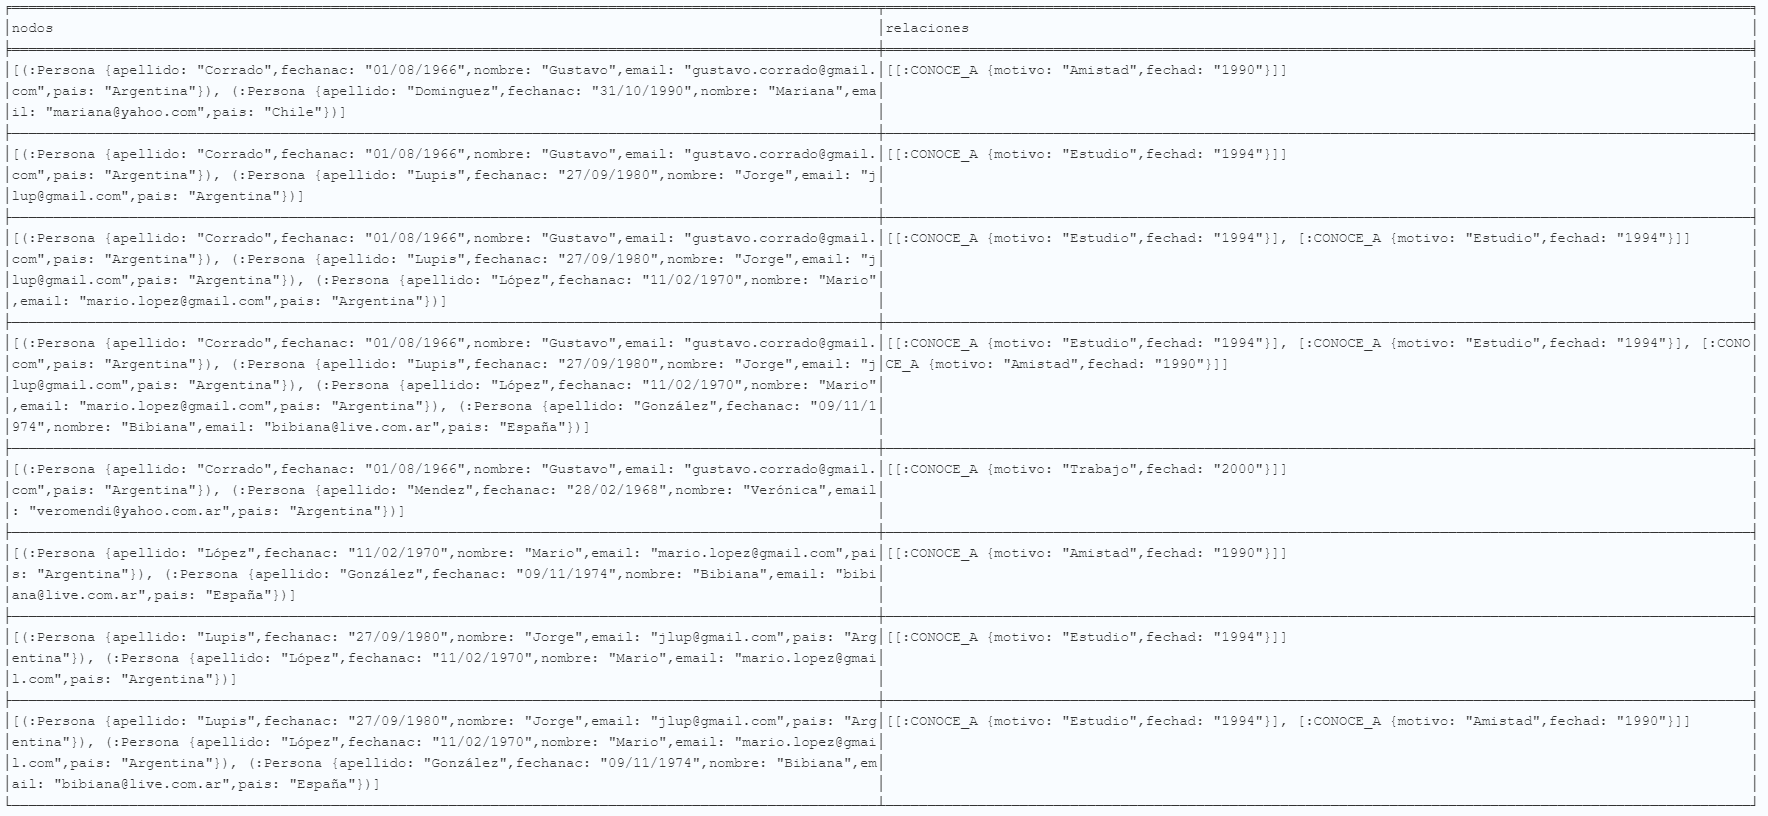

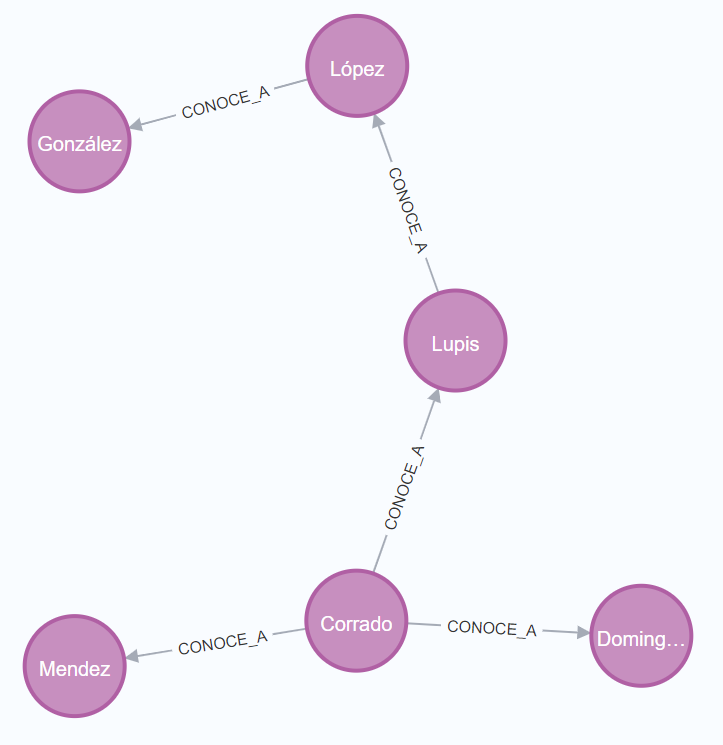

#### **28. Verificar si una persona trabajó o trabajó en empresas que otro determinado profesional trabajo, para sugerir contactos.** 


``` bash -- 
MATCH (p1:Persona {nombre: "Gustavo"})-[:TRABAJO]->(e:Empresa)<-[:TRABAJO]-(p2:Persona)
WHERE p1 <> p2
RETURN p2.nombre AS nombre, p2.apellido AS apellido, e.nombre AS empresa;
```

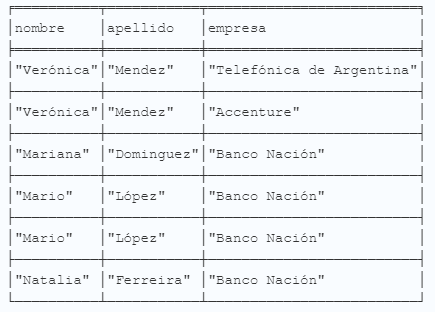

#### **29. Obtener los conocimientos más compartidos en cada carrera.** 


``` bash -- 
MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera),
      (p)-[:POSEE]->(con:Conocimiento)
RETURN c.nombre AS carrera, con.nombre AS conocimiento, count(*) AS cantidad
ORDER BY carrera ASC, cantidad DESC;
```

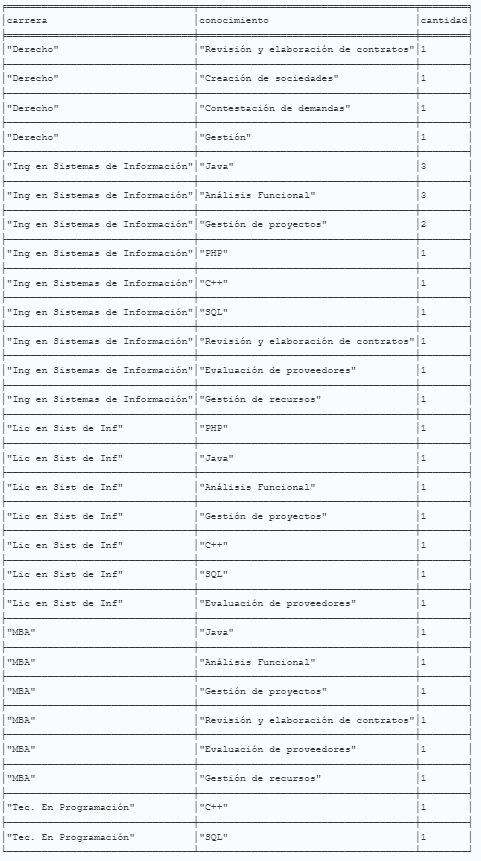

#### **30. Ranking de los primeros 2 conocimientos de la carrera "Ing en Sistemas de Información".** 

``` bash -- 
MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera {nombre: "Ing en Sistemas de Información"}),
      (p)-[:POSEE]->(con:Conocimiento)
RETURN con.nombre AS conocimiento, count(*) AS cantidad
ORDER BY cantidad DESC
LIMIT 2;
```

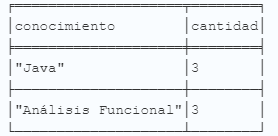